In [16]:
import os

import sys

import pandas as pd

from pathlib import Path

from datetime import datetime, timedelta

sys.path.insert(0, str( Path().parent.resolve().parent ))

In [17]:
from modules.root_file.delete_files import delete_root_files_in_folder

from modules.root_file.assemble_root_files import unify_data_files

from modules.graph.graph_waveforms import GraphWaveforms_File

from modules.graph.graph_names import GraphIncidence_File

In [18]:
df = GraphIncidence_File(
    '../../Data/results/muondecay.root',
    '../../Data/results/',
    'tree_waveforms'    
)

In [44]:
counts = df['time'].value_counts().reset_index()

counts.columns = ['time', 'counts']

date_range = ( counts['time'].min(), counts['time'].max() )

In [45]:
counts

,time,counts
0,2022-06-07,2891
1,2022-06-28,2569
2,2022-06-29,2326
3,2022-06-25,1783
4,2022-06-30,1780
5,2022-06-26,1745
6,2022-06-24,1738
7,2022-06-27,1733
8,2022-06-03,1708
9,2022-05-31,1701


In [46]:
date_range

('2022-04-28', '2022-07-01')

In [105]:
#====================================================================================================
def generate_dates_within_range(start: str, end: str):
    
    if type(start) == str:
        
        start = datetime.strptime(start, "%Y-%m-%d")
    
    if type(end) == str:
        
        end   = datetime.strptime(end  , "%Y-%m-%d")
    
    date_generated = [
        
        datetime.strftime(start + timedelta(days=i), "%Y-%m-%d") \
            for i in range( (end-start).days+1 )  
        ]
    
    dates = pd.DataFrame(date_generated, columns=['time'])
    
    return dates
#====================================================================================================

In [106]:
gen_dates = generate_dates_within_range(*date_range)

# gen_counts = pd.DataFrame(
#     [0 for i in range(gen_dates.shape[0])],
#     columns=['counts']
#     )

# gen_dates_with_counts = pd.concat([gen_dates,gen_counts], axis=1)

In [107]:
gen_dates

,time
0,2022-04-28
1,2022-04-29
2,2022-04-30
3,2022-05-01
4,2022-05-02
...,...
60,2022-06-27
61,2022-06-28
62,2022-06-29
63,2022-06-30


In [128]:
df_inc = counts.merge(gen_dates, how='outer').fillna(0).sort_values(by='time')

df_inc

,time,counts
39,2022-04-28,304.0
19,2022-04-29,1587.0
20,2022-04-30,1560.0
36,2022-05-01,1123.0
16,2022-05-02,1592.0
...,...,...
7,2022-06-27,1733.0
1,2022-06-28,2569.0
2,2022-06-29,2326.0
4,2022-06-30,1780.0


In [129]:
import matplotlib.pyplot as plt

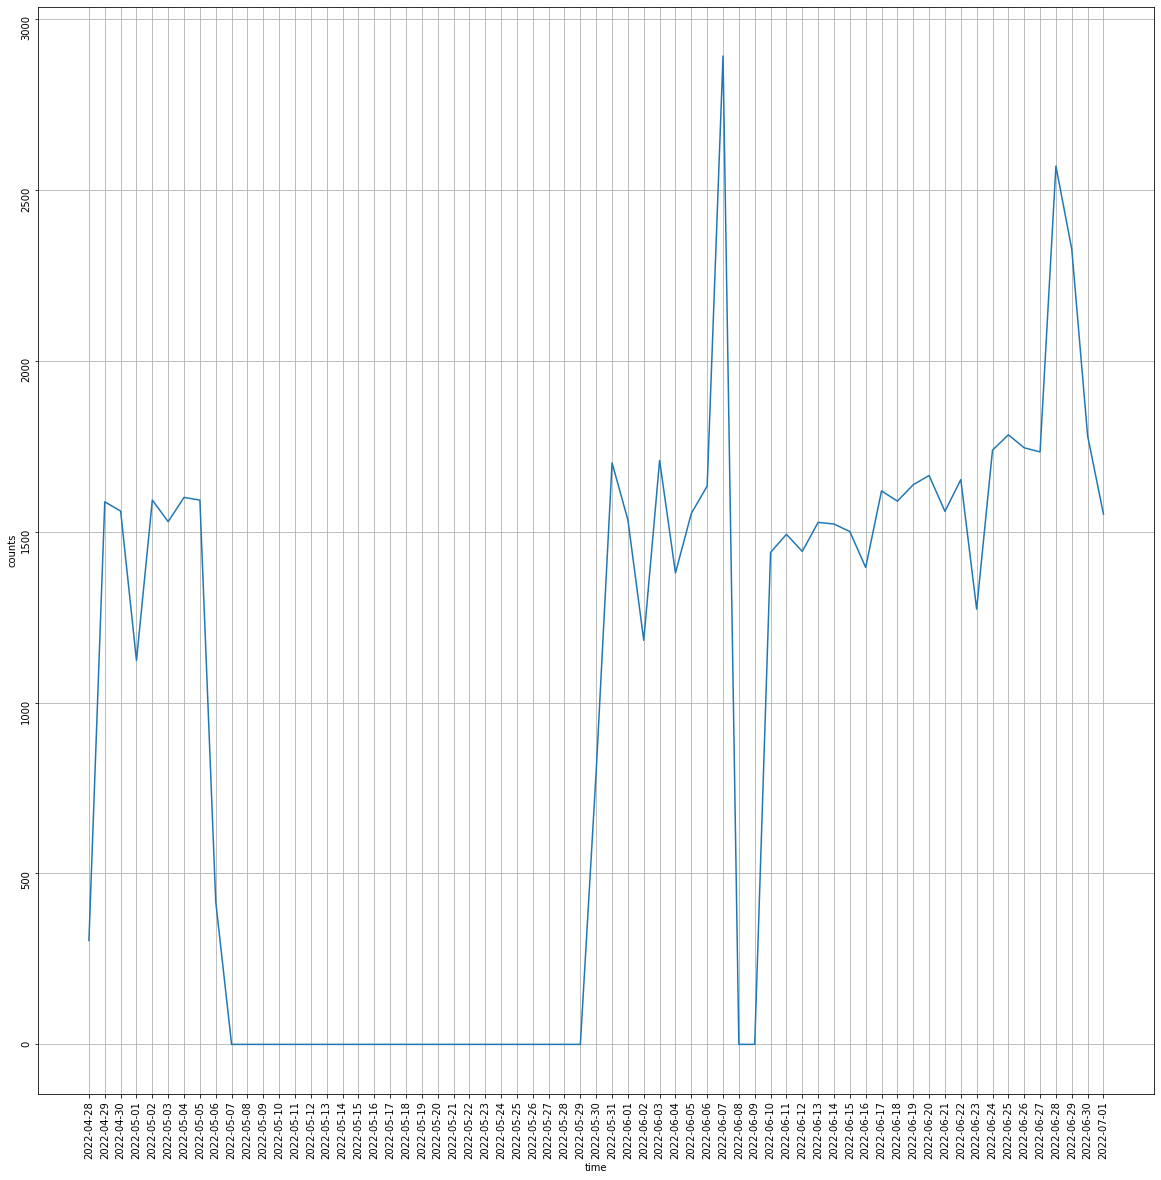

In [130]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))

sns.lineplot(x='time', y='counts', data=df_inc, ax=ax)

ax.tick_params(rotation=90)

plt.grid(visible=True)

plt.show()